In [30]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [5]:
#Uncomment it all if you haven't download the TUDelft data yet
df = dd.read_parquet("hf://datasets/Weijie1996/load_timeseries/30m_resolution_ge/ge_30m.parquet")
df = df.compute()
# Uncomment below if you wanna save the data frame
df['datetime'] = pd.to_datetime(df['datetime'])
df.to_csv('~/Desktop/erdos_deep_learning/data/TUDelft.csv', index=False)

In [6]:
df.head()

,datetime,id,target,category
0,2015-05-21 15:30:00,GE_1,0.157,30m
1,2015-05-21 16:00:00,GE_1,0.584,30m
2,2015-05-21 16:30:00,GE_1,0.545,30m
3,2015-05-21 17:00:00,GE_1,0.677,30m
4,2015-05-21 17:30:00,GE_1,0.351,30m


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


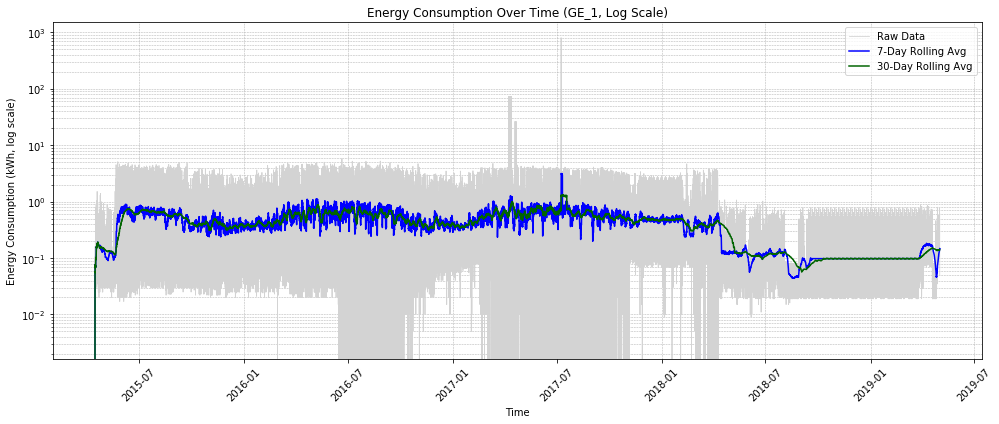

In [15]:
df = df.sort_values('datetime')

# Compute rolling averages
weekly_window = 48 * 7   # 48 half-hour entries per day * 7 days
monthly_window = 48 * 30 # 48 half-hour entries per day * 30 days

df['weekly_avg'] = df['target'].rolling(window=weekly_window, min_periods=1).mean()
df['monthly_avg'] = df['target'].rolling(window=monthly_window, min_periods=1).mean()

# Plot all three
plt.figure(figsize=(14, 6))
plt.plot(df['datetime'], df['target'], color='lightgray', label='Raw Data', linewidth=0.8)
plt.plot(df['datetime'], df['weekly_avg'], color='blue', label='7-Day Rolling Avg')
plt.plot(df['datetime'], df['monthly_avg'], color='darkgreen', label='30-Day Rolling Avg')

plt.yscale('log')
plt.title("Energy Consumption Over Time (GE_1, Log Scale)")
plt.xlabel("Time")
plt.ylabel("Energy Consumption (kWh, log scale)")
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


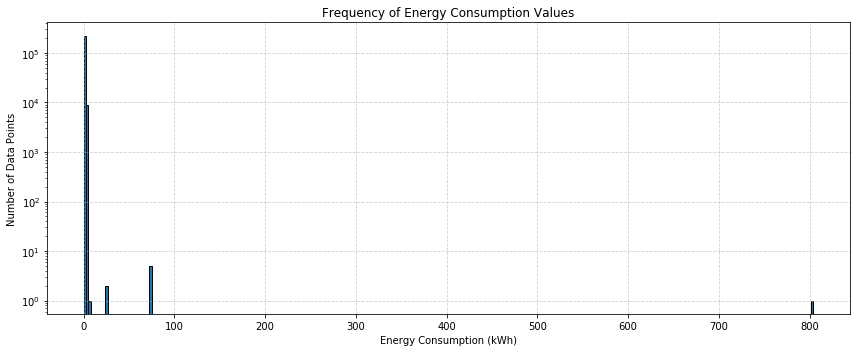

In [20]:
plt.figure(figsize=(12, 5))
plt.hist(df['target'], bins=300, edgecolor='black')
plt.title("Frequency of Energy Consumption Values")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Number of Data Points")
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


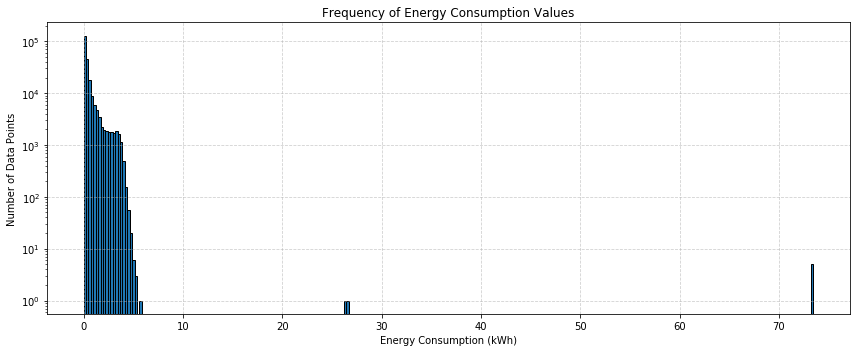

In [24]:
plt.figure(figsize=(12, 5))
plt.hist(df[df['target'] < 800]['target'], bins=300, edgecolor='black')
plt.title("Frequency of Energy Consumption Values < 800 kWh")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Number of Data Points")
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

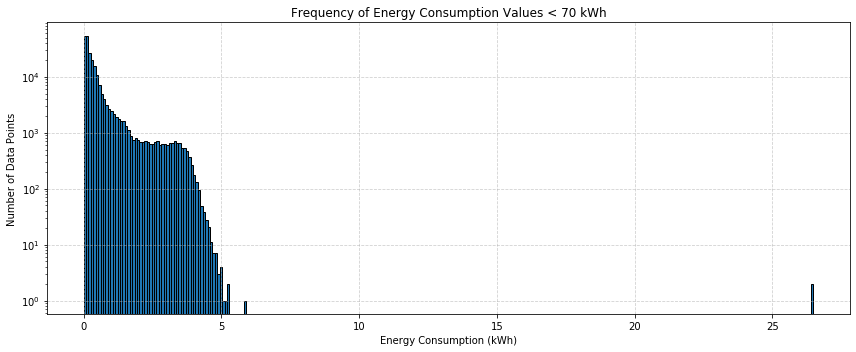

In [25]:
plt.figure(figsize=(12, 5))
plt.hist(df[df['target'] < 70]['target'], bins=300, edgecolor='black')
plt.title("Frequency of Energy Consumption Values < 70 kWh")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Number of Data Points")
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

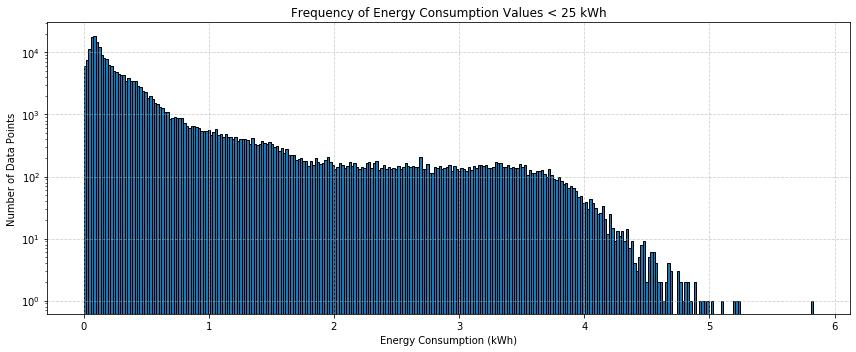

In [26]:
plt.figure(figsize=(12, 5))
plt.hist(df[df['target'] < 25]['target'], bins=300, edgecolor='black')
plt.title("Frequency of Energy Consumption Values < 25 kWh")
plt.xlabel("Energy Consumption (kWh)")
plt.ylabel("Number of Data Points")
plt.yscale('log')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

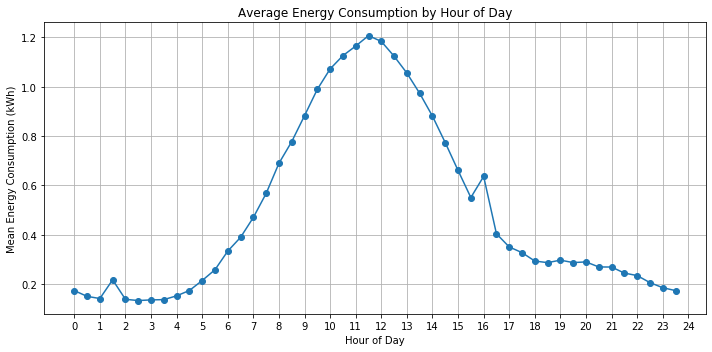

In [31]:
df['hour_of_day'] = df['datetime'].dt.hour + df['datetime'].dt.minute / 60

# Group and average across all days
hourly_avg = df.groupby('hour_of_day')['target'].mean()

# Plot
plt.figure(figsize=(10, 5))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title("Average Energy Consumption by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Energy Consumption (kWh)")
plt.xticks(np.arange(0, 24.5, 1))
plt.grid(True)
plt.tight_layout()
plt.show()

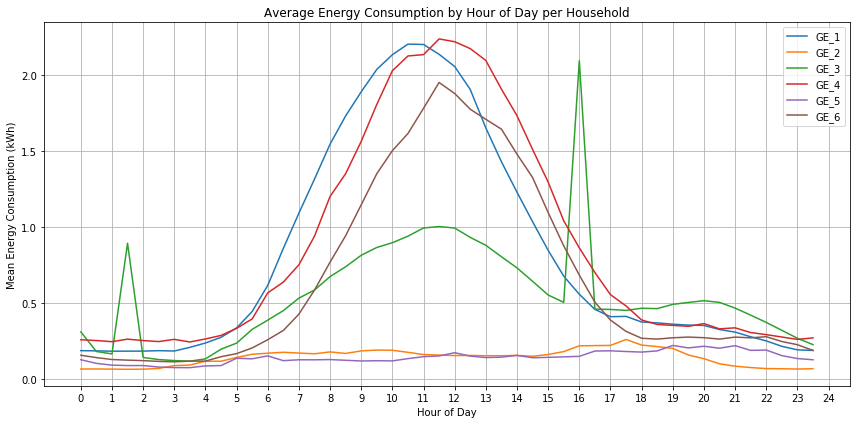

In [32]:
plt.figure(figsize=(12, 6))

for household_id, group in df.groupby('id'):
    group['hour_of_day'] = group['datetime'].dt.hour + group['datetime'].dt.minute / 60
    hourly_avg = group.groupby('hour_of_day')['target'].mean()
    plt.plot(hourly_avg.index, hourly_avg.values, label=household_id)

plt.title("Average Energy Consumption by Hour of Day per Household")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Energy Consumption (kWh)")
plt.xticks(np.arange(0, 24.5, 1))
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

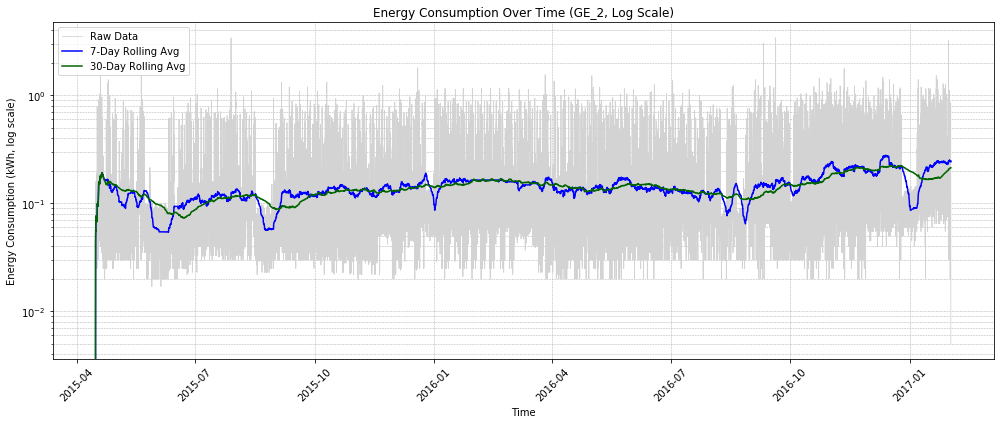

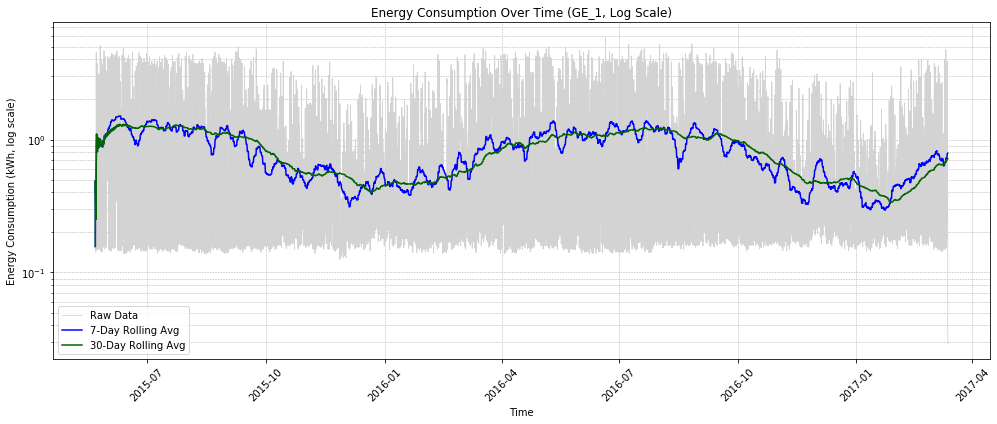

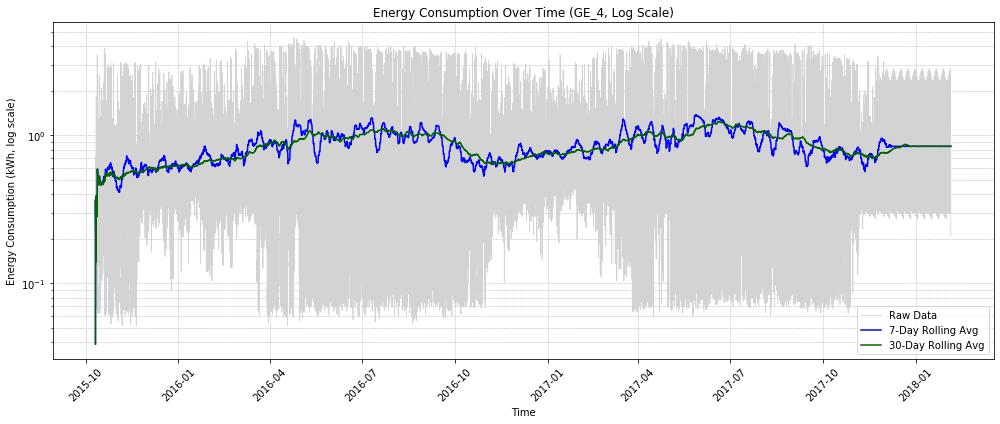

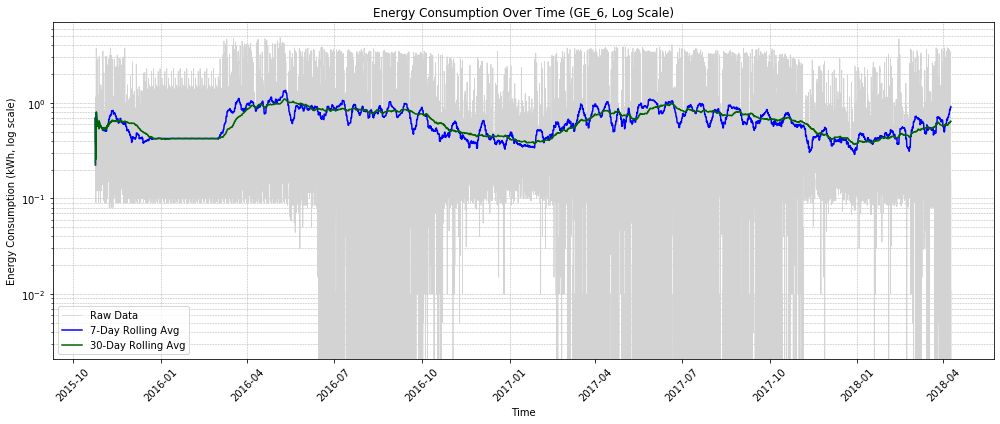

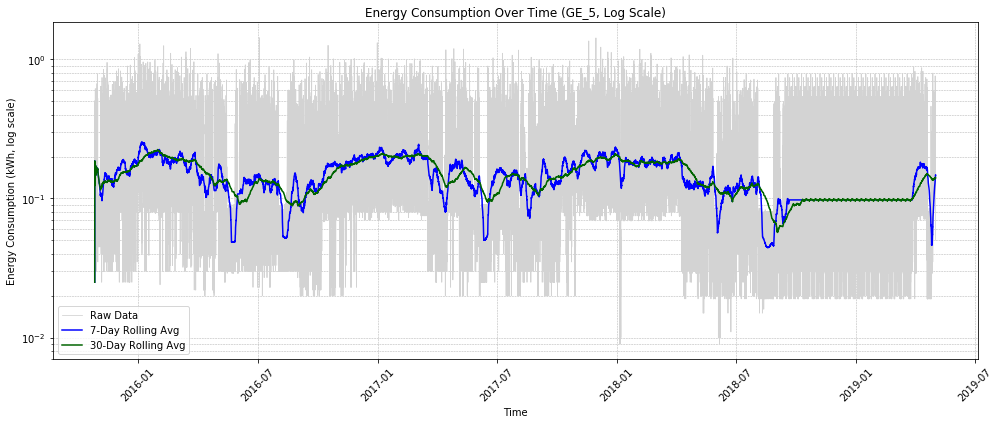

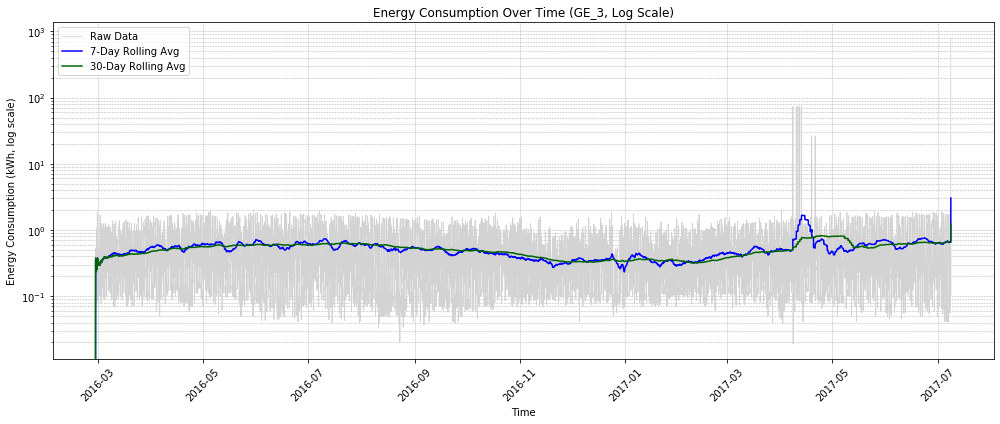

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Ensure datetime is parsed and sorted
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime')

# Set rolling window sizes
weekly_window = 48 * 7    # 1 week
monthly_window = 48 * 30  # 1 month

# Get unique households
households = df['id'].unique()

# Create one plot per household
for household in households:
    subdf = df[df['id'] == household].copy()
    subdf = subdf.sort_values('datetime')

    # Compute rolling averages
    subdf['weekly_avg'] = subdf['target'].rolling(window=weekly_window, min_periods=1).mean()
    subdf['monthly_avg'] = subdf['target'].rolling(window=monthly_window, min_periods=1).mean()

    # Plot
    plt.figure(figsize=(14, 6))
    plt.plot(subdf['datetime'], subdf['target'], color='lightgray', linewidth=0.8, label='Raw Data')
    plt.plot(subdf['datetime'], subdf['weekly_avg'], color='blue', label='7-Day Rolling Avg')
    plt.plot(subdf['datetime'], subdf['monthly_avg'], color='darkgreen', label='30-Day Rolling Avg')

    plt.yscale('log')
    plt.title(f"Energy Consumption Over Time ({household}, Log Scale)")
    plt.xlabel("Time")
    plt.ylabel("Energy Consumption (kWh, log scale)")
    plt.grid(True, which="both", linestyle='--', linewidth=0.5)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()


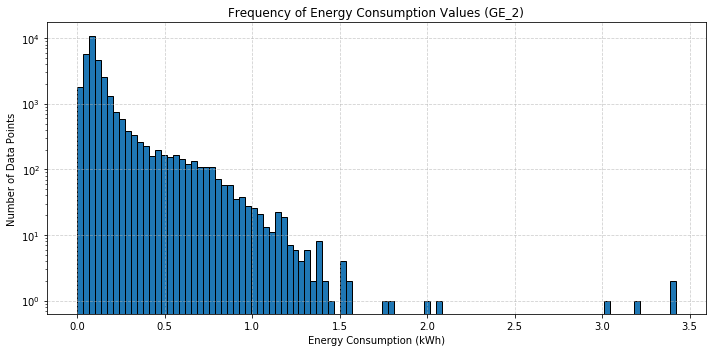

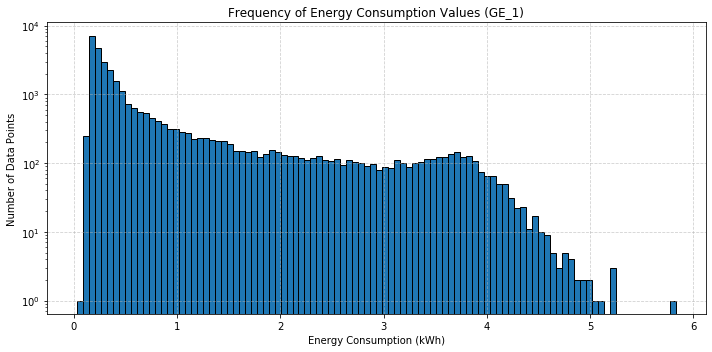

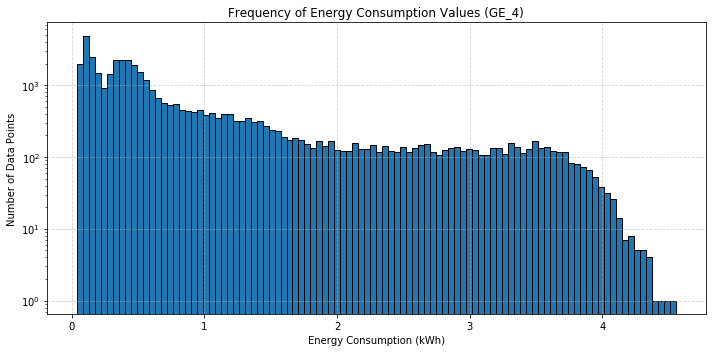

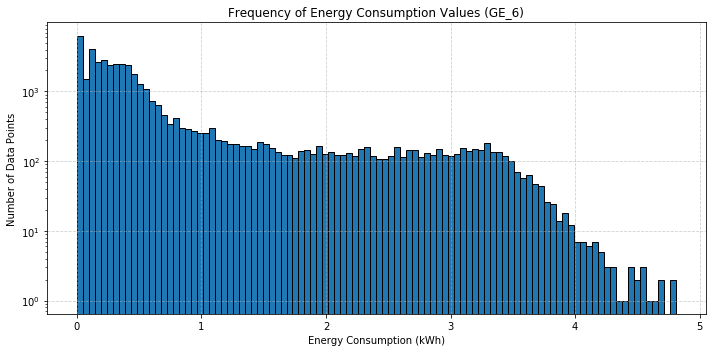

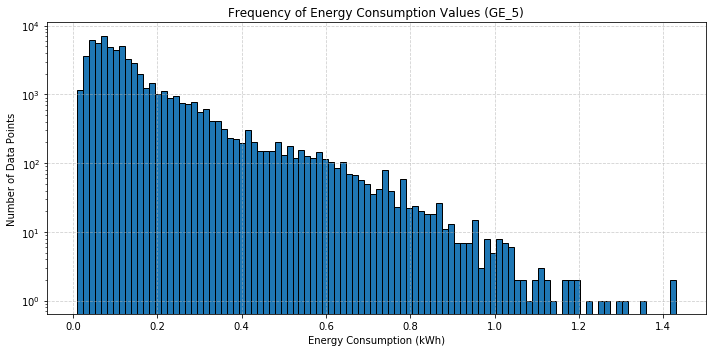

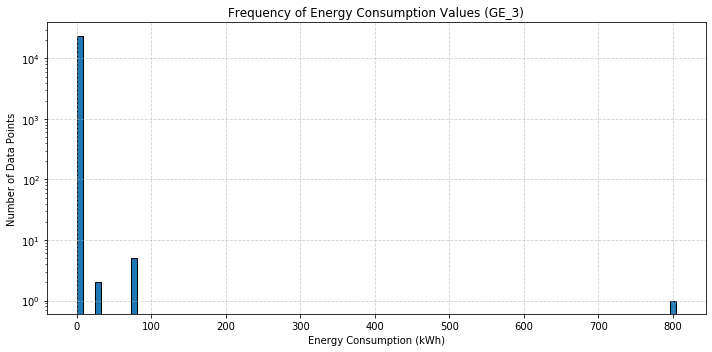

In [34]:
import matplotlib.pyplot as plt

households = df['id'].unique()

for household in households:
    subdf = df[df['id'] == household]

    plt.figure(figsize=(10, 5))
    plt.hist(subdf['target'], bins=100, edgecolor='black')
    plt.title(f"Frequency of Energy Consumption Values ({household})")
    plt.xlabel("Energy Consumption (kWh)")
    plt.ylabel("Number of Data Points")
    plt.yscale('log')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
